In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats
from myst_nb import glue

## Expected Waiting Times ##

Conditioning helps us find expectations of waiting times. All the examples below involve conditioning on early moves of a random process.

### Waiting till H ###
A coin lands heads with chance $p$. Let's call it a $p$-coin for short. Let $W_H$ be the number of tosses of a $p$-coin till the first head appears. The use of $W$ in the notation is because the random variable is often called the *waiting time* till the first head.

We know that $W_H$ has the geometric $(p)$ distribution on $1, 2, 3, \ldots $. We derived its expectation earlier by using the Tail Sum Formula. Here is a quick way to derive $E(W_H)$ without using the formula for the probabilities.

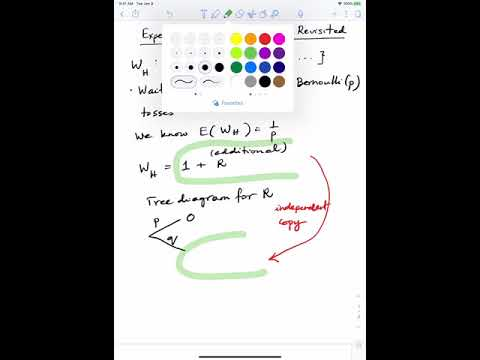

In [2]:
# VIDEO: Expectation of the Geometric, Revisited
from IPython.display import YouTubeVideo

vid_exp_geom_rev = YouTubeVideo('MxeioidxzTA')
glue("vid_exp_geom_rev", vid_exp_geom_rev)

```{dropdown} See More
:icon: video
{glue:}`vid_exp_geom_rev`
```

The method is based on representing $W_H$ in terms of a mixture of random variables. A *mixture* is a description of the random variable by conditioning.

- With probability 1, at least one toss has to be made. So $W_H = 1 + R$ where $R$ is the random number of tosses required after the first one.
- With probability $p$ the first toss is a head, so $R = 0$.
- With the remaining probability $q=1-p$ the first toss is a tail, and then *the process starts over* independently of what has happened before. That is, with probability $q$, $R = W^*$ where $W^*$ is an identically distributed copy of $W_H$.

Let $x = E(W_H)$. By additivity and averaging conditional expectations,

$$
x ~ = ~ 1 + E(R) ~ = ~ 1 + pE(0) ~ + ~ qE(W^*) = 1 + qx
$$

Solve for $x$:

$$
x = \frac{1}{p}
$$

This calculation confirms that in i.i.d. Bernoulli $(p)$ trials, the expected waiting time till the first success is $1/p$.

### Infinite Monkey Theorem ###

"The number of trials till the first success" provides the framework for a rich array of examples, because both "trial" and "success" can be defined to be much more complex than just tossing a coin and getting heads. A classic example is about a professor (or a monkey) drawing independently at random from the 26 letters of the alphabet to see if they ever get the sequence `datascience`. They will, with probability 1, as you can see by overestimating the number of draws they have to make.
- Define a "trial" to be 11 letters picked at random.
- Define a trial to be a "success" if those 11 letters are the sequence `datascience`.

Then the number of trials till `datascience` appears has the geometric distribution with parameter $p = 1/26^{11}$, and therefore has expectation $26^{11}$. That's $26^{11}$ lots of 11 draws, which is an overestimate because you will be watching the draws sequentially and not in blocks of 11. For example, if the first block of 11 ends in `data` and the next block starts with `science`, you will have seen the sequence `datascience` and stopped watching, even though both of those blocks would be called failures and the trials would continue.

There is nothing special about the sequence `datascience`. You can replace it with any finite string of letters, no matter how long. For example, the string could be the complete works of Shakespeare. You will just have to replace 11 by the length of the string. This is popularly known as the [Infinite Monkey Theorem](https://en.wikipedia.org/wiki/Infinite_monkey_theorem).

### Waiting Till Both Faces Have Appeared ###
Suppose we toss the $p$-coin until both faces have appeared. Let $N$ be the number of tosses. 

**Question:** What is $E(N)$?

**Answer:** We can find $E(N)$ by conditioning on the first toss as we did in the previous example.
- With probability 1, $N = 1 + M$ where $M$ is the additional number of tosses needed after the first one.
- With probability $p$ the first toss is a head, so $M = W_T$ where $W_T$ has the geometric $(q)$ distribution.
- With probability $q$ the first toss is a tail, so $M = W_H$ where $W_H$ has the geometric $(p)$ distribution.

So 

$$
E(N) = 1 + p\big{(} \frac{1}{q} \big{)} + q\big{(}\frac{1}{p} \big{)}
= 1 + \frac{p^2 + q^2}{pq} = \frac{1 - pq}{pq}
$$

### Waiting till HH ###
In tosses of a $p$-coin, let $W_{HH}$ be the number of tosses till you see two heads in a row. 

**Question:** What is $E(W_{HH})$?

**Answer 1:** We can find this is several ways. One way is by conditioning on the first two tosses.
- With probability $q$, the first toss is a tail, so $W_{HH} = 1 + W^*$ where $W^*$ is an identically distributed copy of $W_{HH}$.
- With probability $pq$ the first two tosses are HT, and $W_{HH} = 2 + W^{**}$
where $W^{**}$ is an identically distributed copy of $W_{HH}$.
- With probability $p^2$, the first two tosses are heads, and $W_{HH} = 2$.

So if $x = E(W_{HH})$ then

$$
x = q(1+x) + pq(2+x) + p^22
$$

So 

$$
x = \frac{q + 2pq + 2p^2}{1 - q - pq} 
= \frac{1+p}{p^2}
$$

by repeatedly using $p + q = 1$.

**Answer 2:** Another way is by conditioning on the toss after $W_H$ where, as before, $W_H$ is the number of tosses till the first head. We know that $E(W_H) = 1/p$. 

Now $W_{HH} = W_H + V$ where $V$ is the additional number of tosses needed after $W_H$.
- With probability $p$, the toss after $W_H$ is a head, so $V = 1$.
- With probability $q$, the toss after $W_H$ is a tail, so $V = 1 + W^*$ where $W^*$ is an identically distributed copy of $W_{HH}$.

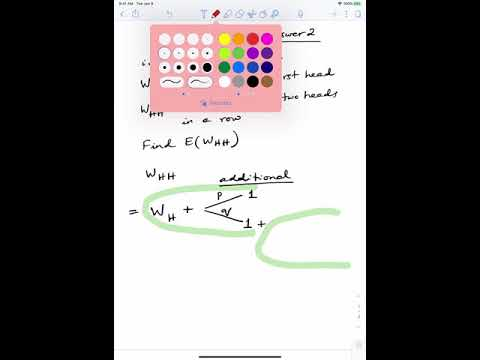

In [3]:
# VIDEO: Tree diagram for Answer 2
vid_tree_ans2 = YouTubeVideo('XivRI0ba2v8')
glue("vid_tree_ans2", vid_tree_ans2)

```{dropdown} See More
:icon: video
{glue:}`vid_tree_ans2`
```

So if $x = E(W_{HH})$ then

$$
x ~ = ~ E(W_H) + E(V) ~ = ~ \frac{1}{p} + p + q(1 + x)
$$

So

$$
px = \frac{1}{p} + 1 ~~~~ \text{and hence} ~~~~ x = \frac{1+p}{p^2}
$$

as before. Notice that the answer can also be written as

$$
E(W_{HH}) ~ = ~ \frac{1}{p^2} + \frac{1}{p}
$$

In exercises you will generalize this to a get formula for the expected waiting time till you see $n$ heads in a row.

### Gambler's Ruin: Duration of the Game ###
Let's return to the setting of the gambler's ruin problem with a fair coin and positive integers $a < b$. The gambler starts with $a$ dollars and bets on tosses of the coin till either his net gain reaches $b$ dollars or he loses all his money. Let $T$ be the duration of the game. 

**Question.** What the expected duration of the game?

**Answer.** Let $E_k(T)$ denote the expected duration of the game given that the gambler starts with a net gain of $k$ dollars. We want $E_0(T)$.

By conditioning on the first step, we see that for $-a+1 \le k \le b-1$,

$$
E_k(T) = 1 + \frac{1}{2}E_{k-1}(T) + \frac{1}{2} E_{k+1}(T)
$$

where the edge cases are

$$
E_{-a}(T) = 0 = E_{a+b}(T)
$$

You can check that the function $f(k) = (b-k)(k+a)$ satisfies this recursion, and hence that $E_0(T) = ab$.